# The Representative Firm

This notebook illustrates how to code a portion of the One-Period Macroeconomic Model in Python. In this notebook, I specifically demonstrate how to model scenarios for the representative firm's optimization problem. Lastly, I will also show how to plot the labour demand curve. The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [NumEconCopenhagen](https://numeconcopenhagen.netlify.app/lectures/Optimize_print_and_plot) are useful resources that informed me in writing this notebook. 

## Table of Contents
- [The Representative Firm's Production Function](#RepFirmProdFunc)
- [Property IV: Marginal Product of Labour Schedule](#MPLSched)
- [Property V: A Change in the Capital Stock](#ChangeInK)
- [Property VI: A Change in The Total Factor Productivity (TFP)](#ChangeInTFP)
- [The Firm's Profit Maximization Problem](#ProfitMax)
- [The Labour Demand Curve](#LabDemand)

## The  Representative Firm's Production Function <a name="RepFirmProdFunc"></a>

The representative firm's production function is defined as:

$$Y = zF(K, N_{d})$$ 

$z$ is the total factor productivity (TFP). $N_{d}$ is the labour input and $K$ is the capital input. $Y$ is quasi-concave and twice differentiable. $Y$ has other key properties worth raising:

- **Property (1):** $Y$ is increasing in both $N_{d}$ and $K$
- **Property (2):** $Y$ has Constant-Returns-To-Scale (CRS) properties
- **Property (3):** Given a fixed level of $K$, the Marginal Product of Labour ($MP_{N}$) is decreases when labour input rises.
- **Property (4):** Given a fixed level of $N_{d}$, the Marginal Product of Capital ($MP_{K}$) is decreases when capital input rises.
- **Property (5):** The Marginal Product of Labour ($MP_{N}$) increases when capital input rises.

CRS properties are discussed in the Malthusian Growth model note. I explore and elaborate on the last three properties in the subsequent sections.

In this notebook, I defined the representative firm's production function as Cobb-Douglas.

$$Y = zK^{\alpha}(N_{d})^{1-\alpha}$$ 

where $z > 0$, $N^{d} \geq 0$, $K \geq 0$. $K$ is fixed at some level $\bar{K}$. $\alpha$ is the capital share of output, $0 \leq \alpha \leq 1$. According to Williamson (2014), the estimated value of $\alpha$ is equal to 0.3. Solving the first order partial derivative, $\frac{\partial Y}{\partial N_{d}}$ is equal to the Marginal Product of Labour ($MU_{N}$) while solving for $\frac{\partial Y}{\partial K}$ is equal to the Marginal Product of Capital ($MU_{K}$).

To begin plotting the production function, it is important to import the necessary libraries. Two libraries are used in this note: `numpy` and `matplotlib`. In the section of code below, I imported the relevant Python libraries and the functions needed for plotting variables. As I previously mentioned on the value of $K$, $\bar{K}=100$. I arbitrarily defined labour input, $N_{d}$, as $1\leq N_{d} \leq 30$. Lastly, I plotted the $Y$, against $N_{d}$ and $MU_{N}$ when $N_{d} = 10$. 

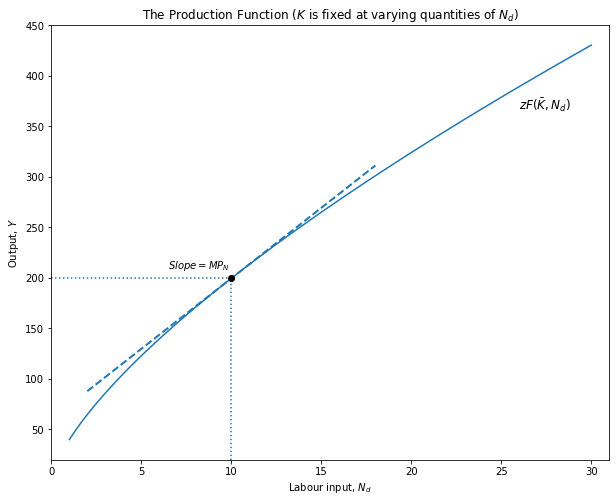

In [75]:
"""
Import relevant libraries
"""
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import minimize_scalar

# Define parameters
z = 10 # value of total factor productivity
K = 100 # a fixed capital stock value
N_d = np.linspace(1, 30, 100) 

# Python function for the representative firm's production function
def Y(z, K, N_d, alpha = 0.3): 
    return z*K**alpha*N_d**(1-alpha)
# Python function for Marginal Product of Labour
def MPN(z, K, N_d, alpha=0.3): 
    return z*(K**alpha)*(1-alpha)*(N_d**-alpha)

"""
Plot the Production Function (K is fixed) and the MPL
"""
N_bar = 10 # fixed value of labour 
Y_bar = Y(z, K, N_bar, alpha = 0.3) # fixed value of output at N_bar
w = MPN(z, K, N_bar, alpha=0.3) # set slope which is the marginal product of labour at N_bar

# Define tangent line using slope-point form
# y = m*(x - x1) + y1
def tangent_line(x_range, x_bar, y_bar, slope):
    return slope*(x_range - x_bar) + y_bar

# Define x-axis (labour input) range for tangent line
N_range = np.linspace(N_bar-8, N_bar+8, 10)

# Plot the production function (K is fixed)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The Production Function ($K$ is fixed at varying quantities of $N_{d}$)", xlabel=r'Labour input, $N_{d}$', ylabel=r'Output, $Y$')
ax.plot(N_d, Y(z, K, N_d)) # plot Y against N_d
ax.text(26, 367, r'$zF(\bar{K}, N_{d})$', fontsize = 12) # text indicating production function
v = [min(N_d)-1, max(N_d)+1, min(Y(z, K, N_d))-20, max(Y(z, K, N_d))+20] # values for setting the axes range
# horizontal line 
ax.hlines(y=Y(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line 
ax.vlines(x=N_bar, ymin=0, ymax=Y(z, K, N_bar), color='tab:blue', linestyles='dotted')
ax.axis(v) # Set the axes range;
ax.text(N_bar*0.65, Y_bar*1.05, '$Slope = MP_{N}$') # multiply by 1.03 to give space;
ax.plot(N_range, tangent_line(N_range, N_bar, Y_bar, w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line
ax.plot(N_bar, Y_bar,'ro',color='black') # a black dot

The marginal product of labour, $MU_{N}$, is the slope of the production function at any given point. One important point to highlight is that as $Y$ increases, $MP_{N}$ decreases. 

The next section of code below plots the production function but this time $N_{d}$ is fixed, $\bar{N_{d}} = 100$. A function is created to calculate the marginal product of capital, $MP_{K}$ which is also plotted at the point where $K = 10$.

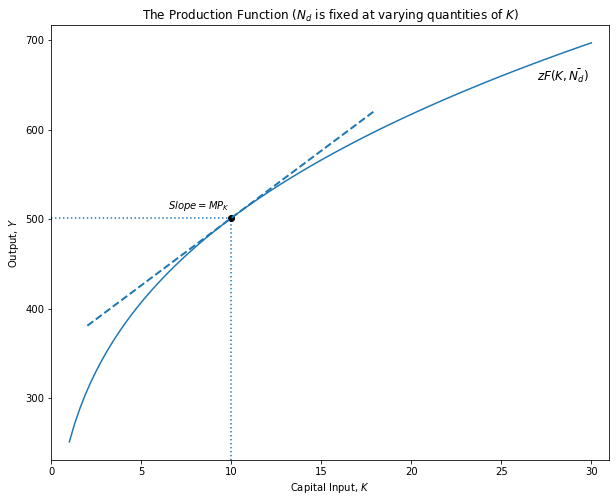

In [76]:
"""
Plot the Production Function (L is fixed) and the MPK
"""
# Python function for Marginal Product of Capital
def MPK(z, K, N_d, alpha=0.3): 
    return z*alpha*(K**(alpha-1))*(N_d**(1-alpha))

# Re-set parameters
z = 10 # value of total factor productivity
K = np.linspace(1, 30, 100)  
N_d = 100 # fixed labour input

K_bar = 10 # fixed value of capital
Y_bar = Y(z, K_bar, N_d) # fixed value of output at K_bar
w = MPK(z, K_bar, N_d, alpha=0.3) # set slope which is the marginal product of capital at K_bar

# Define tangent line using slope-point form
# y = m*(x - x1) + y1
def tangent_line(x_range, x_bar, y_bar, slope):
    return slope*(x_range - x_bar) + y_bar

# Define x-axis (labour input) range for tangent line
K_range = np.linspace(K_bar-8, K_bar+8, 10)

# Plot the production function (N_d is fixed)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The Production Function ($N_{d}$ is fixed at varying quantities of $K$)", xlabel=r'Capital Input, $K}$', ylabel=r'Output, $Y$')
ax.plot(K, Y(z, K, N_d)) # plot Y against N_d
ax.text(27, 655, r'$zF(K, \bar{N_{d}})$', fontsize = 12) # text indicating production function
v = [min(K)-1, max(K)+1, min(Y(z, K, N_d))-20, max(Y(z, K, N_d))+20] # values for setting the axes range
ax.axis(v) # Set the axes range;
# horizontal line 
ax.hlines(y=Y(z, K_bar, N_d), xmin=0, xmax=K_bar, color='tab:blue', linestyles='dotted')
# vertical line 
ax.vlines(x=N_bar, ymin=0, ymax=Y(z, K_bar, N_d), color='tab:blue', linestyles='dotted')
ax.plot(K_bar, Y_bar,'ro',color='black') # a black dot
ax.text(K_bar*0.65, Y_bar*1.02, '$Slope = MP_{K}$') 
ax.plot(K_range, tangent_line(K_range, K_bar, Y_bar, w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line; call the tangent_line function from prior section

As shown in the plot above, $MP_{K}$ similar to $MP_{N}$ is decreasing in $Y$.

## Property IV: Marginal Product of Labour Schedule <a name="MPLSched"></a>

The code below plots the Marginal Product of Labour ($MP_{N}$) Schedule for the representative firm. The diminishing $MP_{N}$ is reflected by the convexity of the production function, $Y$. As labour inputs ($N_{d}$) increase, the slope of $Y$, the $MP_{N}$ decreases.

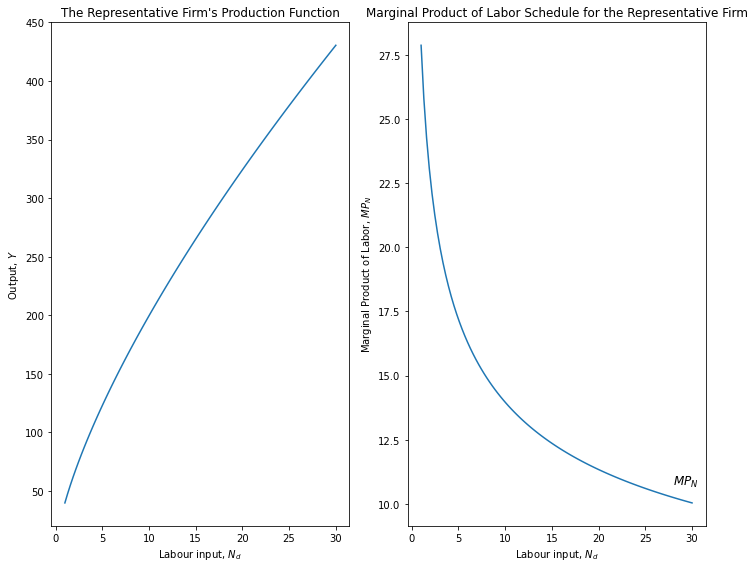

In [170]:
"""
Plot the Marginal Product of Labor Schedule for the Representative Firm
"""
# Define parameters
z = 10 # value of total factor productivity
K = 100 # a fixed capital stock value
N_d = np.linspace(1, 30, 100) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
# Plot the production function (K is fixed)
ax[0].plot(N_d, Y(z, K, N_d), color='tab:blue') # plot Y against N_d at old level of capital stock
ax[0].set(title="The Representative Firm's Production Function", xlabel=r'Labour input, $N_{d}$', ylabel=r'Output, $Y$')

# Plot the Marginal product of labour (K is fixed)
ax[1].set(title="Marginal Product of Labor Schedule for the Representative Firm", xlabel=r'Labour input, $N_{d}$', ylabel=r'Marginal Product of Labor, $MP_{N}$')
ax[1].plot(N_d, MPN(z, K, N_d)) # plot Y against N_d
ax[1].text(28, 10.75, '$MP_{N}$', fontsize=12)
fig.tight_layout()

As shown in the plot above and assuming a constant capital stock, as the firm adds more labour input, the marginal product of labour for the firm decreases. You can also notice that the rate at which the firm's output is increasing declines as more labour input is added. 

In other words, assume a firm has a labourer, $N_{D}^{1}$, and a single machine. The labourer could access this machine at all times, do tasks with it, and is very productive as a result. Now the firm adds another labourer, $N_{D}^{2}$ and would now have to share the single machine with $N_{D}^{1}$. This causes $N_{D}^{1}$ to wait whenever the other labourer is using the machine and vice versa. This wait time could be spent doing productive work. Adding another labourer, $N_{D}^{3}$, exacerbates the wait time, resulting in backlogs and less productivity for the firm and all labourers involved.

## Property V: A Change in the Capital Stock <a name="ChangeInK"></a>

Adding capital stock increases the $MP_{N}$. Now imagine that the firm has three labourers $N_{D}^{1}$, $N_{D}^{2}$, and $N_{D}^{3}$. All three labourers have to share a single machine to do work. The firm decides to generously buy two new machines which results in the each labourer having his/her own machine. As a result, all labourers would not have to share a single machine together, causing backlogs and wait times to disappear and for all workers to be more productive in doing tasks with their own machines.

In the section of code below, I plot this scenario and show how th $Y$ and $MP_{N}$ would behave due to an increase in $K$.

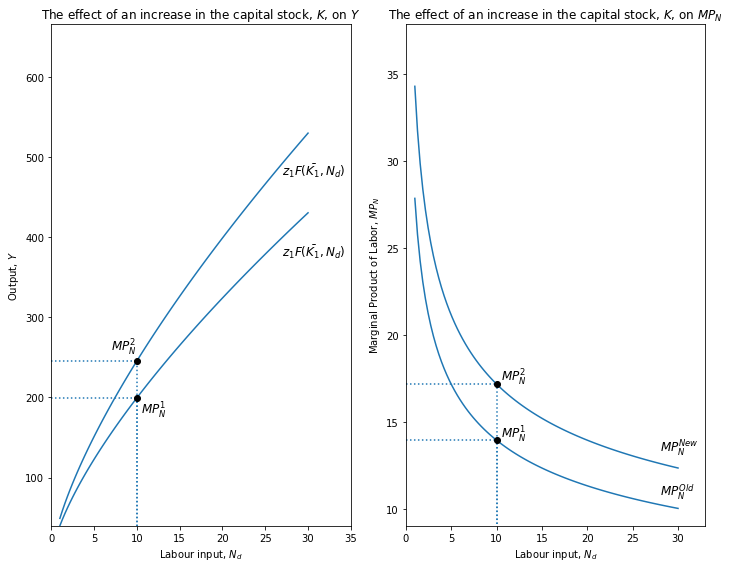

In [171]:
"""
Plot the MPL Schedule for the Representative Firm when K increases
"""
# Define parameters
z = 10 # value of total factor productivity
K = 100 # a fixed capital stock value
K_ = 200 # new capital stock value
N_d = np.linspace(1, 30, 100) 
N_bar = 10 # fixed level of labour input

# Plot the production function (K is fixed)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax[0].set(title="The effect of an increase in the capital stock, $K$, on $Y$", xlabel=r'Labour input, $N_{d}$', ylabel=r'Output, $Y$')
v = [min(N_d)-1, max(N_d)+5, min(Y(z_, K, N_d))-20, max(Y(z_, K, N_d))+20] # values for setting the axes range
ax[0].plot(N_d, Y(z, K, N_d), color='tab:blue') # plot Y against N_d at old level of capital stock
ax[0].plot(N_d, Y(z, K_, N_d), color='tab:blue') # plot Y against N_d at new level of capital stock 

# horizontal line at old ouput
ax[0].hlines(y=Y(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at old output
ax[0].vlines(x=N_bar, ymin=0, ymax=Y(z, K, N_bar), color='tab:blue', linestyles='dotted')
# horizontal line at new ouput
ax[0].hlines(y=Y(z, K_, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at new output
ax[0].vlines(x=N_bar, ymin=0, ymax=Y(z, K_, N_bar), color='tab:blue', linestyles='dotted')
ax[0].text(27, 377, r'$z_{1}F(\bar{K_{1}}, N_{d})$', fontsize = 12) # text indicating old production function
ax[0].text(27, 477, r'$z_{1}F(\bar{K_{1}}, N_{d})$', fontsize = 12) # text indicating new production function
ax[0].plot(N_bar, Y(z, K, N_bar),'ro',color='black') # a black dot
ax[0].plot(N_bar, Y(z, K_, N_bar),'ro',color='black') # a black dot
ax[0].text(N_bar*1.05, Y(z, K, N_bar)*0.90, r'$MP_{N}^{1}$', fontsize = 12) # text indicating old Y
ax[0].text(N_bar*0.70, Y(z, K_, N_bar)*1.05, r'$MP_{N}^{2}$', fontsize = 12) # text indicating new Y
ax[0].axis(v) # Set the axes range;

ax[1].set(title="The effect of an increase in the capital stock, $K$, on $MP_{N}$", xlabel=r'Labour input, $N_{d}$', ylabel=r'Marginal Product of Labor, $MP_{N}$')
ax[1].plot(N_d, MPN(z, K, N_d), color='tab:blue') # plot Y against N_d
ax[1].plot(N_d, MPN(z, K_, N_d), color='tab:blue') # plot Y against N_d, at new K
v = [min(N_d)-1, max(N_d)+3, min(MPN(z, K, N_d))-1, max(MPN(z, K, N_d))+10] # values for setting the axes range
# horizontal line at old ouput
ax[1].hlines(y=MPN(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at old output
ax[1].vlines(x=N_bar, ymin=0, ymax=MPN(z, K, N_bar), color='tab:blue', linestyles='dotted')
# horizontal line at new ouput
ax[1].hlines(y=MPN(z, K_, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at new output
ax[1].vlines(x=N_bar, ymin=0, ymax=MPN(z, K_, N_bar), color='tab:blue', linestyles='dotted')
ax[1].text(N_bar*1.05, MPN(z, K, N_bar)*1.01, r'$MP_{N}^{1}$', fontsize = 12) # text indicating old MPN
ax[1].text(N_bar*1.05, MPN(z, K_, N_bar)*1.01, r'$MP_{N}^{2}$', fontsize = 12) # text indicating new MPN
ax[1].plot(N_bar, MPN(z, K, N_bar),'ro',color='black') # a black dot
ax[1].plot(N_bar, MPN(z, K_, N_bar),'ro',color='black') # a black dot
ax[1].text(28, 10.75, '$MP_{N}^{Old}$', fontsize=12) # text indicating old MPN
ax[1].text(28, 13.30, '$MP_{N}^{New}$', fontsize=12) # text indicating new MPN
ax[1].axis(v) # Set the axes range;
fig.tight_layout()

We can see in the plot above that $K$ and the firm's $MP_{N}$ schedule increase. While I previously discussed how an increase $K$ would be beneficial for the firm, graphically, this is represented by how the $MP_{N}$ at some constant level of labour increases when $K$ increases. In this example, the fixed labour input is set at 10, but this idea applies to all values of labour input, $1\leq N_{d} \leq 30$.

## Property VI: A Change in The Total Factor Productivity (TFP) <a name="ChangeInTFP"></a>

A change in TFP, $z$ has two effects:
- (1) It shifts the Production Function up, meaning more output could be produced for a given input of labour and capital. $Y$ will shift upwards.
- (2) The Marginal Product of Labour increases when $z$ increases, this is because an increase in $z$ results in a higher slope for $Y$. The $MP_{N}$ schedule will shift to the right.

In the section of code below, I created two plots to show how an increase in $z$ results in a shift in both $Y$ and the $MP_{N}$ schedule I also indicated the change in $MP_{N}$ in both plots.

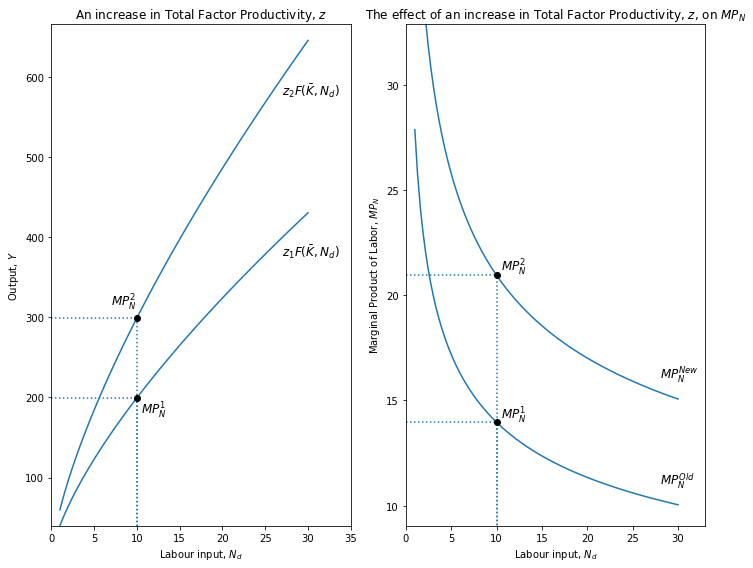

In [168]:
"""
Plot the change in Total Factor Productivity (TFP)
"""
z = 10 # old TFP
z_ = 15 # new TFP
N_bar = 10 # fixed value of labour 
# Plot the production function (K is fixed)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax[0].set(title="An increase in Total Factor Productivity, $z$", xlabel=r'Labour input, $N_{d}$', ylabel=r'Output, $Y$')
ax[0].plot(N_d, Y(z, K, N_d), color='tab:blue') # plot Y against N_d 
ax[0].plot(N_d, Y(z_, K, N_d), color='tab:blue') # plot Y against N_d at new value of TFP
v = [min(N_d)-1, max(N_d)+5, min(Y(z_, K, N_d))-20, max(Y(z_, K, N_d))+20] # values for setting the axes range
# horizontal line at old ouput
ax[0].hlines(y=Y(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at old output
ax[0].vlines(x=N_bar, ymin=0, ymax=Y(z, K, N_bar), color='tab:blue', linestyles='dotted')
# horizontal line at new ouput
ax[0].hlines(y=Y(z_, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at new output
ax[0].vlines(x=N_bar, ymin=0, ymax=Y(z_, K, N_bar), color='tab:blue', linestyles='dotted')
ax[0].plot(N_bar, Y(z, K, N_bar),'ro',color='black') # a black dot
ax[0].plot(N_bar, Y(z_, K, N_bar),'ro',color='black') # a black dot
ax[0].text(27, 377, r'$z_{1}F(\bar{K}, N_{d})$', fontsize = 12) # text indicating old production function
ax[0].text(27, 577, r'$z_{2}F(\bar{K}, N_{d})$', fontsize = 12) # text indicating new production function
ax[0].text(N_bar*1.05, Y(z, K, N_bar)*0.90, r'$MP_{N}^{1}$', fontsize = 12) # text indicating old Y
ax[0].text(N_bar*0.70, Y(z_, K, N_bar)*1.05, r'$MP_{N}^{2}$', fontsize = 12) # text indicating new Y
ax[0].axis(v) # Set the axes range;
"""
Effect of z increase on TFP
"""
# Define parameters
z = 10 # old TFP
z_ = 15 # new TFP
K = 100 # fixed capital stock value
N_d = np.linspace(1, 30, 100) 
# Plot the production function (K is fixed)
ax[1].set(title="The effect of an increase in Total Factor Productivity, $z$, on $MP_{N}$", xlabel=r'Labour input, $N_{d}$', ylabel=r'Marginal Product of Labor, $MP_{N}$')
ax[1].plot(N_d, MPN(z, K, N_d), color='tab:blue') # plot Y against N_d
ax[1].plot(N_d, MPN(z_, K, N_d), color='tab:blue') # plot Y against N_d, at new K
v = [min(N_d)-1, max(N_d)+3, min(MPN(z, K, N_d))-1, max(MPN(z, K, N_d))+5] # values for setting the axes range
# horizontal line at old ouput
ax[1].hlines(y=MPN(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at old output
ax[1].vlines(x=N_bar, ymin=0, ymax=MPN(z, K, N_bar), color='tab:blue', linestyles='dotted')
# horizontal line at new ouput
ax[1].hlines(y=MPN(z_, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line at new output
ax[1].vlines(x=N_bar, ymin=0, ymax=MPN(z_, K, N_bar), color='tab:blue', linestyles='dotted')
ax[1].plot(N_bar, MPN(z, K, N_bar),'ro',color='black') # a black dot
ax[1].plot(N_bar, MPN(z_, K, N_bar),'ro',color='black') # a black dot
ax[1].text(N_bar*1.05, MPN(z, K, N_bar)*1.01, r'$MP_{N}^{1}$', fontsize = 12) # text indicating old MPN
ax[1].text(N_bar*1.05, MPN(z_, K, N_bar)*1.01, r'$MP_{N}^{2}$', fontsize = 12) # text indicating new MPN
ax[1].text(28, 11.00, '$MP_{N}^{Old}$', fontsize=12) # text indicating old MPN schedule
ax[1].text(28, 16.00, '$MP_{N}^{New}$', fontsize=12) # text indicating new MPN schedule
ax[1].axis(v) # Set the axes range;
fig.tight_layout()

## Profit Maximization <a name="ProfitMax"></a>

Since $K$ is fixed in the production function, the representative firm's profit maximization problem is to select some level of $N^{d}$ to maximize profits, $\pi$ as shown in the equation below:

$$\max_{N_{d}} \pi = zK^{\alpha}(N^{d})^{1-\alpha} - wN_{d}$$ 

Note $\pi$ is the firm's real profit, which is difference between the firm's revenue and labour costs since the firm would have to pay a real wage, $w$ to workers. When solving the maximization problem through first-order condition (FOC), a unique interior solution arises where the marginal product of labour ($MU_{N}$) is equal to the real wage:

$$MU_{N} = w$$

$$zK^{\alpha}(1-\alpha)N_d^{-\alpha} = w$$

This means that the firm will keep hiring labourers until $MU_{N}$ equals $w$. In the section of code below, I first solve the firm's maximized level of profit when the labour input is equal to 10 ($N_{d} = 10$) and then plot the maximum level of profit at $N_{d} = 10$.

In [44]:
"""
Plot the Production Function (L is fixed), the MPK and the variable cost
"""
# Define parameters
z = 10 # value of total factor productivity
K = 100 # a fixed capital stock value
N_d = np.linspace(1, 30, 100) 

# Python function for the representative firm's production function
def Y(z, K, N_d, alpha = 0.3): 
    return z*K**alpha*N_d**(1-alpha)
# Python function for Marginal Product of Labour
def MPN(z, K, N_d, alpha=0.3): 
    return z*(K**alpha)*(1-alpha)*(N_d**-alpha)
# Python function for Variable Cost
def VC(w, N_d):
    return w*N_d

N_bar = 10 # fixed value of labour 
Y_bar = Y(z, K, N_bar, alpha = 0.3) # fixed value of output at N_bar
w = MPN(z, K, N_bar, alpha=0.3) # set slope which is the marginal product of labour at N_bar

# Define tangent line using slope-point form
# y = m*(x - x1) + y1
def tangent_line(x_range, x_bar, y_bar, slope):
    return slope*(x_range - x_bar) + y_bar

# Define x-axis (labour input) range for tangent line
N_range = np.linspace(N_bar-10, N_bar+30, 10)

# Solve profit at N_bar
pi = Y_bar-VC(w, N_bar)

print("The maximized value of real profit when the real wage is $" + str(round(w, 2)) + " is $" + str(round(pi, 2)))

The maximized value of real profit when the real wage is $13.97 is $59.86


Next, the results are plotted. 

Text(10.5, 193.54044455198127, '$Y = 199.53$')

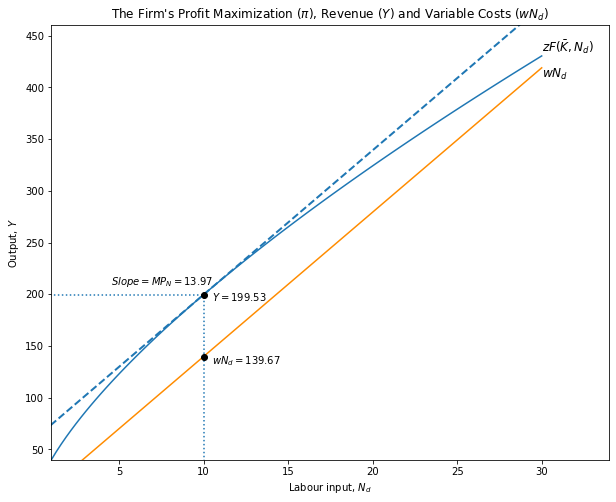

In [61]:
# Plot the production function (K is fixed)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The Firm's Profit Maximization ($\pi$), Revenue ($Y$) and Variable Costs ($wN_{d}$)", xlabel=r'Labour input, $N_{d}$', ylabel=r'Output, $Y$')
ax.plot(N_d, Y(z, K, N_d)) # plot Y against N_d
ax.text(30, 435.00, r'$zF(\bar{K}, N_{d})$', fontsize = 12) # text indicating production function
v = [min(N_d), max(N_d)+4, min(Y(z, K, N_d)), max(Y(z, K, N_d))+30] # values for setting the axes range
# horizontal line 
ax.hlines(y=Y(z, K, N_bar), xmin=0, xmax=N_bar, color='tab:blue', linestyles='dotted')
# vertical line 
ax.vlines(x=N_bar, ymin=0, ymax=Y(z, K, N_bar), color='tab:blue', linestyles='dotted')
ax.axis(v) # Set the axes range;
ax.text(N_bar*0.45, Y_bar*1.05, f'$Slope = MP_{{N}} = {round(w, 2)}$') # add space to the text so it doesn't overlap with the lines
ax.plot(N_range, tangent_line(N_range, N_bar, Y_bar, w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line
ax.plot(N_bar, Y_bar,'ro',color='black') # a black dot
ax.text(30, 410.00, r'$wN_{d}$', fontsize = 12) # text indicating production function
ax.plot(N_d, VC(w, N_d), color='darkorange')
ax.plot(N_bar, VC(w, N_bar),'ro',color='black') # a black dot
ax.text(N_bar*1.05, VC(w, N_bar)*0.95, f'$wN_{{d}} = {round(VC(w, N_bar), 2)}$') # add space to the text so it doesn't overlap with the lines
ax.text(N_bar*1.05, Y_bar*0.97, f'$Y = {round(Y_bar, 2)}$') # add space to the text so it doesn't overlap with the lines

As shown in the plot above, the representative firm's maximized profit is defined as the difference between the point where $Y = 199.53$ and the point $wN_{d} = 139.67$.

## The Labour Demand Curve <a name="LabDemand"></a>

Since the firm hires labour up until when $MP_{N} = w$, the $MP_{N}$ schedule/curve is equivalent to the labour demand curve. 

Text(28, 10.75, '$MP_{N}$')

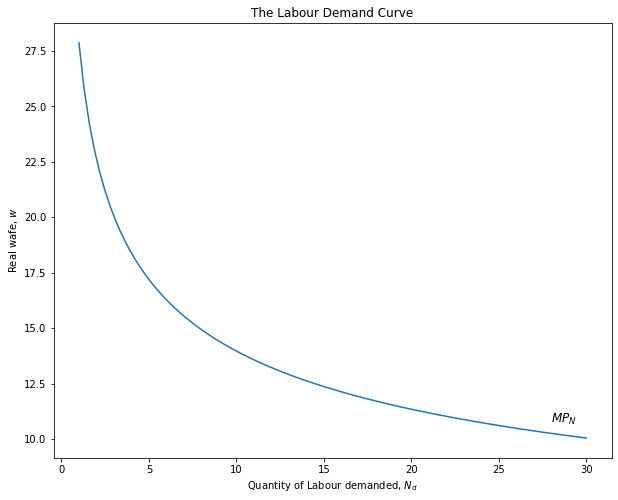

In [169]:
"""
Plot the Marginal Product of Labor Schedule for the Representative Firm
"""
# Define parameters
z = 10 # value of total factor productivity
K = 100 # a fixed capital stock value
N_d = np.linspace(1, 30, 100) 
fig, ax = plt.subplots(figsize=(10, 8))
# Plot the production function (K is fixed)
# Plot the Marginal product of labour (K is fixed)
ax.set(title="The Labour Demand Curve", xlabel=r'Quantity of Labour demanded, $N_{d}$', ylabel=r'Real wafe, $w$')
ax.plot(N_d, MPN(z, K, N_d)) # plot Y against N_d
ax.text(28, 10.75, '$MP_{N}$', fontsize=12)